In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 52.4 MB/s eta 0:00:00


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
df = pd.read_excel('bdv_dataset.xlsx')

In [123]:
df.head(5)

,Country,Year,GDP Growth,GDP per Capita,Rural Population Percentage,Urban Population Percentage,Energy Use_x,Electric Power Consumption,Urban Agglomeration,Industry Value,...,Alternative Energy_x,Alternative Energy_y,Energy Use_y,Fuel Exports,Air Transport,Burned Area,Temperature,Precipitation,CO2,Forest
0,Australia,1990,3.576486,2.054794,14.567,85.433,5061.500154,8527.214094,61.199230,28.774326,...,1.273873,1.273873,5061.500154,19.966950,255900.0,NaN,22.04,435.48,278.1542,17.427359
1,Australia,1991,-0.383072,-1.644753,14.597,85.403,4927.771326,8522.141472,61.325729,27.647951,...,1.438957,1.438957,4927.771326,21.591813,283600.0,NaN,22.20,477.68,279.5285,17.400439
2,Australia,1992,0.428620,-0.689506,14.715,85.285,4963.858162,8558.334218,61.292303,26.864624,...,1.363647,1.363647,4963.858162,21.170585,324600.0,NaN,21.68,466.72,284.5253,17.373518
3,Australia,1993,4.047425,3.125986,14.843,85.157,5156.933379,8717.645239,61.399875,26.821615,...,1.400296,1.400296,5156.933379,20.424799,347700.0,NaN,21.91,498.84,288.8705,17.346598
4,Australia,1994,3.980923,2.984298,14.972,85.028,5103.947956,8837.004453,61.465029,26.779549,...,1.390703,1.390703,5103.947956,17.329113,405600.0,NaN,21.84,355.25,293.6966,17.319678


In [124]:
df.isna().sum()

Country                           0
Year                              0
GDP Growth                        1
GDP per Capita                    1
Rural Population Percentage       0
Urban Population Percentage       0
Energy Use_x                     77
Electric Power Consumption       82
Urban Agglomeration              31
Industry Value                   12
Inflation                         5
Imports                           4
Agriculture Forestry Fishing     12
Fossil Fuel                      77
Metal Exports                    42
Alternative Energy_x             91
Alternative Energy_y             91
Energy Use_y                     77
Fuel Exports                     42
Air Transport                    44
Burned Area                     175
Temperature                       0
Precipitation                     0
CO2                               0
Forest                            0
dtype: int64

In [125]:
country_names = ['Australia', 'Brazil', 'Botswana', 'China', 'Congo, Dem. Rep.', 'Germany', 'United Kingdom', 'India', 'Norway', 'Niger', 'Romania', 'United States']

In [126]:
for country in country_names:
  df_aux = df[df['Country'] == country]
  df[df['Country'] == country] = df_aux.fillna(df_aux.mean(numeric_only=True))

In [127]:
df.isna().sum()

Country                          0
Year                             0
GDP Growth                       0
GDP per Capita                   0
Rural Population Percentage      0
Urban Population Percentage      0
Energy Use_x                     0
Electric Power Consumption       0
Urban Agglomeration             31
Industry Value                   0
Inflation                        0
Imports                          0
Agriculture Forestry Fishing     0
Fossil Fuel                      0
Metal Exports                    0
Alternative Energy_x             0
Alternative Energy_y             0
Energy Use_y                     0
Fuel Exports                     0
Air Transport                    0
Burned Area                     31
Temperature                      0
Precipitation                    0
CO2                              0
Forest                           0
dtype: int64

In [128]:
df = df.fillna(df.mean(numeric_only=True))

In [129]:
df.isna().sum()

Country                         0
Year                            0
GDP Growth                      0
GDP per Capita                  0
Rural Population Percentage     0
Urban Population Percentage     0
Energy Use_x                    0
Electric Power Consumption      0
Urban Agglomeration             0
Industry Value                  0
Inflation                       0
Imports                         0
Agriculture Forestry Fishing    0
Fossil Fuel                     0
Metal Exports                   0
Alternative Energy_x            0
Alternative Energy_y            0
Energy Use_y                    0
Fuel Exports                    0
Air Transport                   0
Burned Area                     0
Temperature                     0
Precipitation                   0
CO2                             0
Forest                          0
dtype: int64

In [130]:
total = sum(df.groupby('Country')['Country'].agg('count'))
values = [value for value in df.groupby('Country')['Country'].agg('count')]

data = {}
for index, name in enumerate(df.groupby('Country')['Country'].agg('count').index):
    data[name] = values[index]

print(data)

{'Australia': 31, 'Botswana': 31, 'Brazil': 31, 'China': 31, 'Congo, Dem. Rep.': 31, 'Germany': 31, 'India': 31, 'Niger': 31, 'Norway': 31, 'Romania': 31, 'United Kingdom': 31, 'United States': 31}


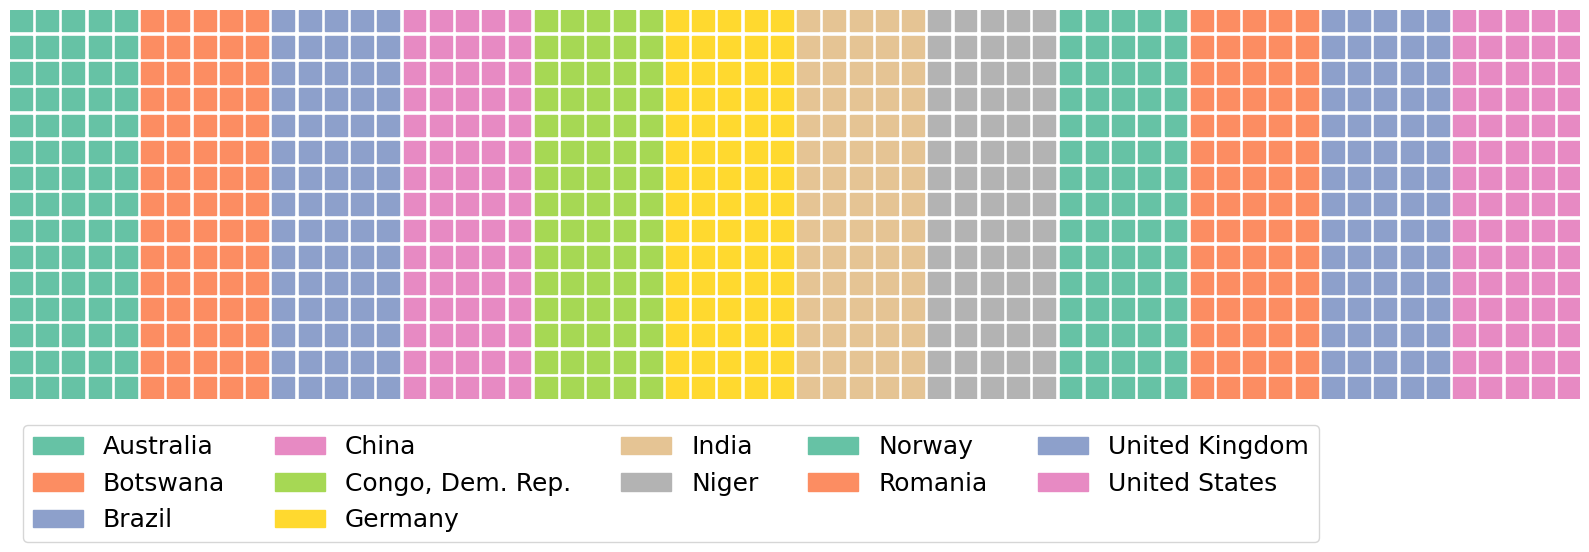

In [ ]:
import pywaffle

fig = plt.figure(
        FigureClass = pywaffle.Waffle,
        rows = 15,
        columns = 60,
        values = data,
        legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol':5, 'fontsize': 18},
        figsize = (16, 8))

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=df.groupby('Country')['Country'].agg('count').index,values=df.groupby('Country')['Country'].agg('count'), name="Countries")])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Temperature", y="Year", facet_col="Country")
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Forest", y="Year", facet_col="Country")
fig.show()

CO2 - GDP per Capital dependency

In [ ]:
fig = px.scatter(df.query("CO2>0"), x="CO2", y="GDP per Capita",color="Country",
                 hover_name="Country", log_x=True ,size_max=60)
fig.show()

In [ ]:
fig = px.scatter(df.query("CO2>0"), x="CO2", y="Energy Use_x",color="Country",
                 hover_name="Country", log_x=True ,size_max=60)
fig.show()

In [ ]:
fig = px.scatter(df.query("CO2>0"), x="CO2", y="Imports",color="Country",
                 hover_name="Country", log_x=True, log_y=True ,size_max=60)
fig.show()

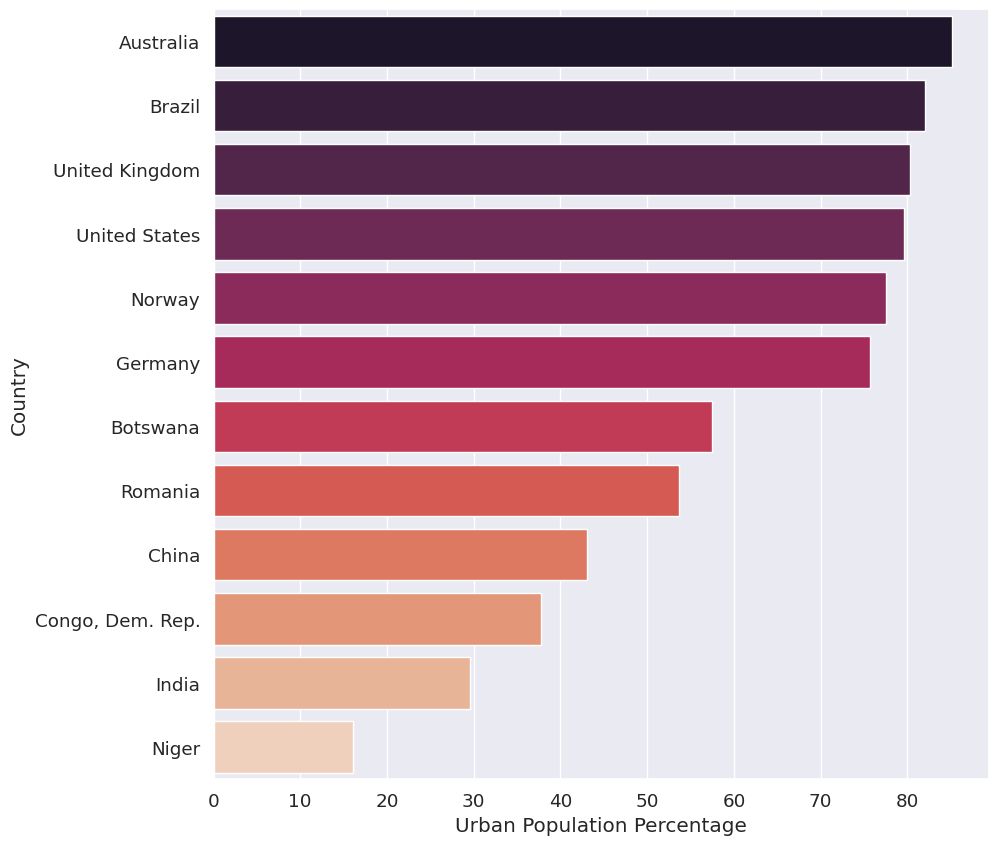

In [ ]:
import seaborn as sns

df1 = df.groupby("Country")['Urban Population Percentage'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
f = sns.barplot(data = df1, x = 'Urban Population Percentage', y = 'Country',palette = 'rocket')

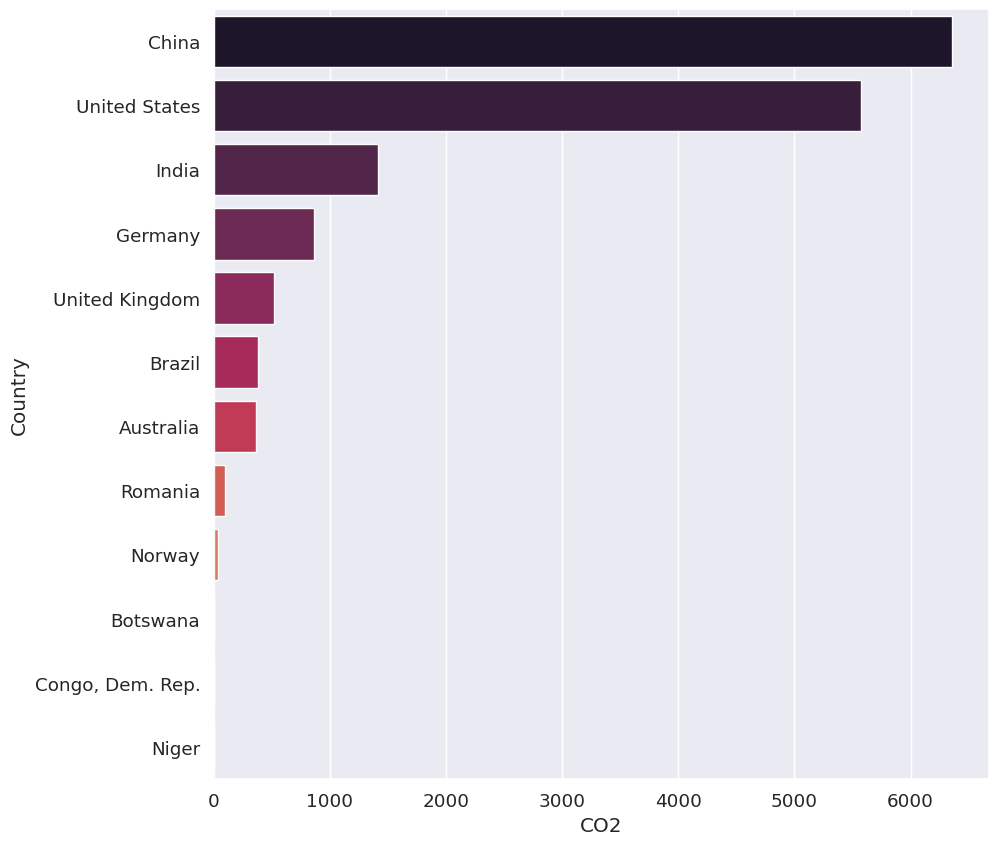

In [152]:
import seaborn as sns

df1 = df.groupby("Country")['CO2'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
f = sns.barplot(data = df1, x = 'CO2', y = 'Country',palette = 'rocket')

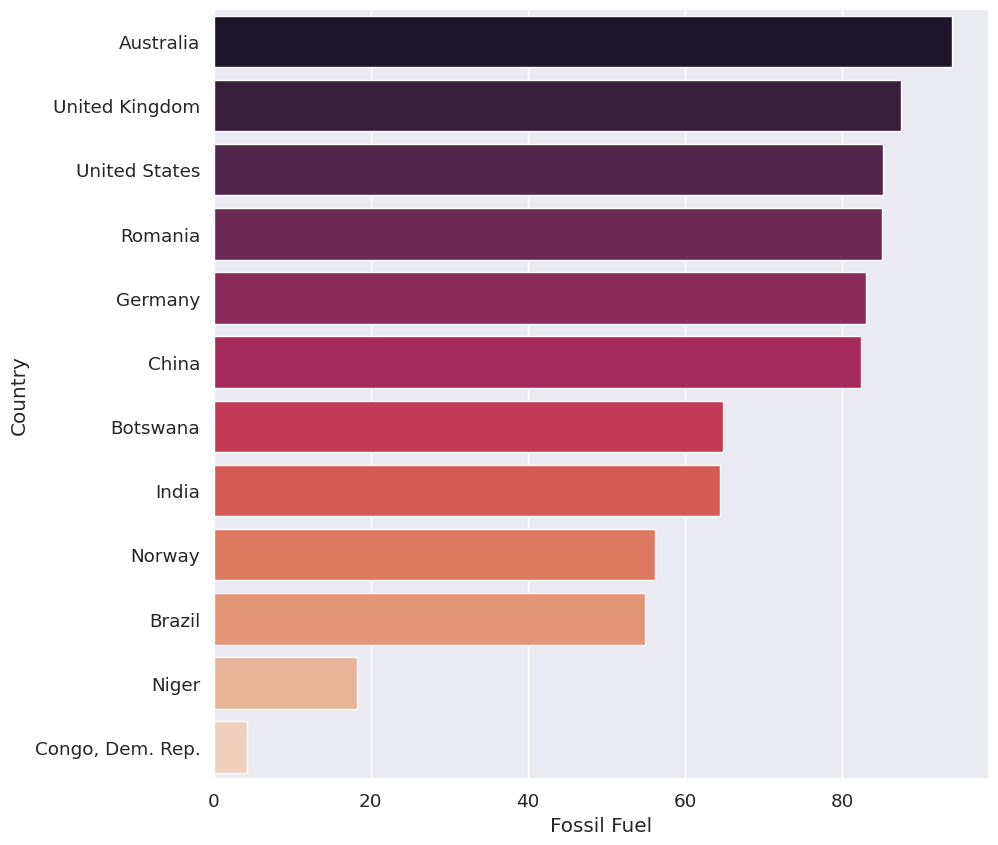

In [103]:
import seaborn as sns

df1 = df.groupby("Country")['Fossil Fuel'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
f = sns.barplot(data = df1, x = 'Fossil Fuel', y = 'Country',palette = 'rocket')

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create a DataFrame with country names and corresponding values
data = {'Country': ['Australia', 'Brazil', 'Botswana', 'China', 'Congo, Dem. Rep.', 'Germany', 'United Kingdom', 'India', 'Norway', 'Niger', 'Romania', 'United States'],
        'Value': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]}

df = pd.DataFrame(data)

# Initialize a geocoder
geolocator = Nominatim(user_agent='my_app')

# Create a Folium map centered around the world
map = folium.Map(location=[0, 0], zoom_start=2)

# Define the colormap
colormap = cm.ScalarMappable(norm=colors.Normalize(vmin=df['Value'].min(), vmax=df['Value'].max()), cmap='RdYlGn')

# Iterate over the DataFrame rows and geocode the country names
for index, row in df.iterrows():
    location = geolocator.geocode(row['Country'])
    if location:
        latitude, longitude = location.latitude, location.longitude
        folium.CircleMarker(
            location=[latitude, longitude],
            radius=row['Value'] / 100,
            color=colormap.to_rgba(row['Value']),
            fill=True,
            fill_color=colormap.to_rgba(row['Value']),
            fill_opacity=0.6,
            tooltip=row['Country']
        ).add_to(map)

# Show the map
map

In [75]:
data = df.pivot(index='Year',columns='Country',values='Industry Value')
data

Country,Australia,Botswana,Brazil,China,"Congo, Dem. Rep.",Germany,India,Niger,Norway,Romania,United Kingdom,United States
Year,,,,,,,,,,,,
1990,28.774326,56.906563,33.271883,41.032919,32.684644,27.800096,27.453695,27.565358,29.530046,45.879473,27.345938,20.201707
1991,27.647951,53.545149,31.767243,41.487396,32.684644,33.524152,26.441720,25.798130,28.406745,42.238759,26.648078,20.201707
1992,26.864624,49.661633,34.132272,43.115333,32.684644,32.515893,26.792743,24.159514,28.021272,43.140052,26.261457,20.201707
1993,26.821615,47.879504,37.299120,46.176535,32.684644,30.606492,26.781554,22.153223,27.595862,39.037124,25.683248,20.201707
1994,26.779549,43.259056,35.420920,46.163061,15.871993,30.196988,27.628201,23.515830,27.900468,42.732837,26.208594,20.201707
1995,26.413439,43.892879,23.381460,46.750542,16.864007,29.768079,28.599809,21.214447,28.793070,36.390035,24.267446,20.201707
1996,25.961568,45.426903,22.340115,47.104243,32.353958,28.855926,27.912270,21.183227,30.968775,37.795165,24.402639,20.201707
1997,25.198157,45.694519,22.594148,47.099046,21.250000,28.578130,27.837031,20.795886,31.473005,36.002604,23.539025,23.132101
1998,25.362513,43.545248,22.118790,45.797636,20.445650,28.384498,27.303038,18.601547,27.600075,32.212215,22.925452,22.670558


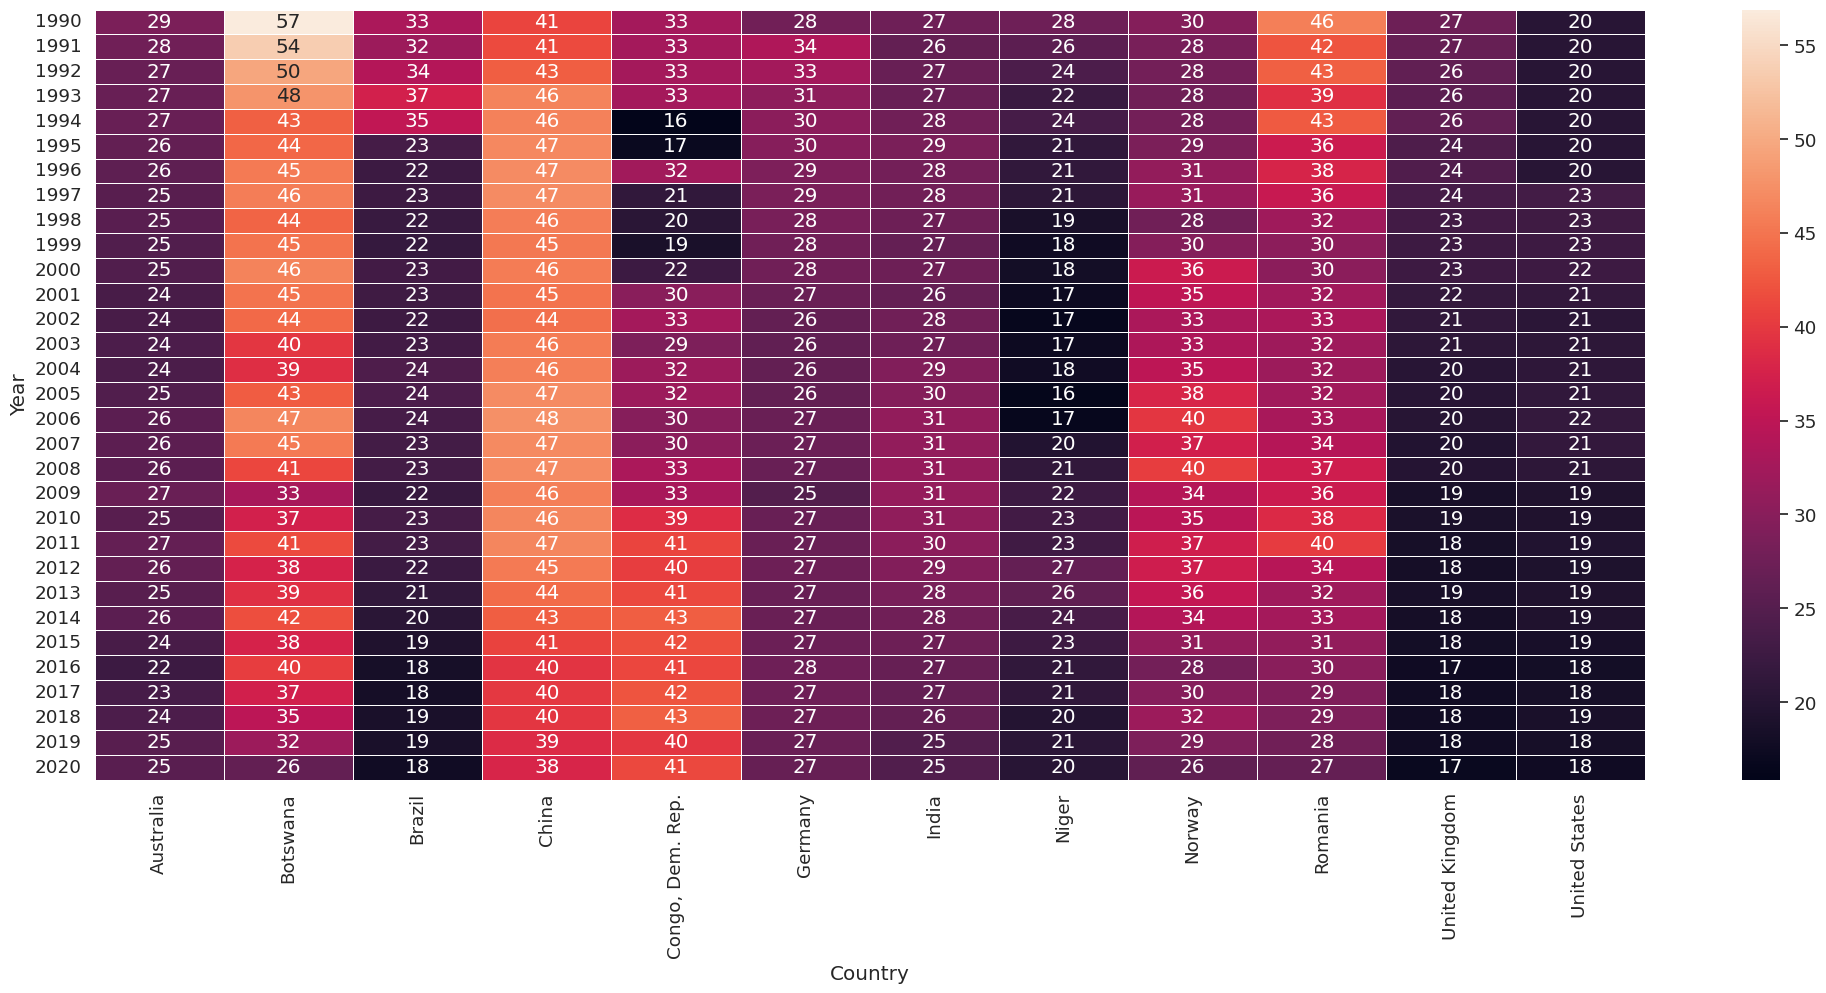

In [76]:
plt.figure(figsize=(25,10))
sns.heatmap(data, cmap = 'rocket', annot = True, linewidths=.5)
plt.ylabel('Year')
plt.show()

In [80]:
import plotly.graph_objects as go

fig = px.pie(df, values='Air Transport', names='Country', title='Air Transport By Country')

fig.show()

In [81]:
import plotly.graph_objects as go

fig = px.pie(df, values='CO2', names='Country', title='CO2 Emissions By Country')

fig.show()

In [83]:
import plotly.graph_objects as go

fig = px.pie(df, values='Fossil Fuel', names='Country', title='Industry By Country')

fig.show()

In [102]:
import plotly.express as px

df_sorted = df.sort_values(by='CO2', ascending=True)
fig = px.bar(df_sorted, x='CO2', y='Country', title='CO2 By Country')

fig.show()

In [138]:
data = df.pivot(index='Year',columns='Country',values='CO2')
data

Country,Australia,Botswana,Brazil,China,"Congo, Dem. Rep.",Germany,India,Niger,Norway,Romania,United Kingdom,United States
Year,,,,,,,,,,,,
1990,278.1542,2.7004,218.6580,2484.8548,4.24900,1051.9791,577.9965,0.60178,35.097,173.4639,601.9451,5122.4962
1991,279.5285,2.6344,229.3940,2606.0962,3.13260,1013.8241,615.3655,0.56879,33.535,141.9153,609.4127,5064.9872
1992,284.5253,2.7773,233.6010,2730.7876,2.80820,965.5418,655.4476,0.52849,34.455,131.5099,593.8459,5175.2200
1993,288.8705,3.1950,244.3060,2921.6510,2.66230,955.8199,677.2998,0.60184,36.000,122.2786,579.6125,5274.3626
1994,293.6966,3.0301,254.0020,3100.0020,1.69820,939.4923,716.2686,0.57975,37.905,120.5423,574.0169,5365.5788
1995,305.0030,3.0448,268.6780,3357.9089,2.10360,938.6136,761.4492,0.56192,38.508,125.5826,566.1590,5427.7985
1996,311.8861,2.7553,289.3110,3503.2337,2.31110,958.7004,825.2008,0.64200,41.572,128.9356,586.7607,5616.4309
1997,320.2826,2.7993,306.9490,3510.1693,1.87540,930.8701,858.9351,0.64606,41.734,117.9628,562.7081,5691.8646
1998,334.0760,3.3416,317.3590,3360.4554,1.65550,922.8122,876.9521,0.69741,41.871,104.3989,568.5437,5737.1294


In [112]:
import requests

def getPopulation(year):
    response = requests.get(f"https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date={year}&format=json&per_page=5000")
    data = response.json()[1]
    return [{'Country': d['country']['value'], 'Population': d['value'] or 0} for d in data]

import pandas as pd

def createDataFrameForPopulation(year):
  population = getPopulation(year)
  df = pd.DataFrame(population)
  df['Year'] = year
  cols = list(df.columns)
  cols = [cols[0]] + [cols[len(cols)-1]] + cols[1:len(cols)-1]
  df = df.reindex(columns=cols)
  return df

In [144]:
population = []
for year in range(1990, 2021):
    population_data_frame = createDataFrameForPopulation(year)
    population += [population_data_frame]
population_data_frame = pd.concat(population)

In [145]:
population_data_frame = population_data_frame[population_data_frame['Country'].isin(country_names)]

In [146]:
data = df[['Year','Country','CO2']]
data = data.merge(population_data_frame, on=['Country','Year'])

In [148]:
data

,Year,Country,CO2,Population
0,1990,Australia,278.1542,17065128
1,1991,Australia,279.5285,17284036
2,1992,Australia,284.5253,17478635
3,1993,Australia,288.8705,17634808
4,1994,Australia,293.6966,17805468
...,...,...,...,...
367,2016,United States,5251.7576,323071755
368,2017,United States,5210.9576,325122128
369,2018,United States,5376.6572,326838199
370,2019,United States,5259.1438,328329953


In [149]:
data['CO2'] = data['CO2'].div(data['Population'])

In [150]:
data

,Year,Country,CO2,Population
0,1990,Australia,0.000016,17065128
1,1991,Australia,0.000016,17284036
2,1992,Australia,0.000016,17478635
3,1993,Australia,0.000016,17634808
4,1994,Australia,0.000016,17805468
...,...,...,...,...
367,2016,United States,0.000016,323071755
368,2017,United States,0.000016,325122128
369,2018,United States,0.000016,326838199
370,2019,United States,0.000016,328329953


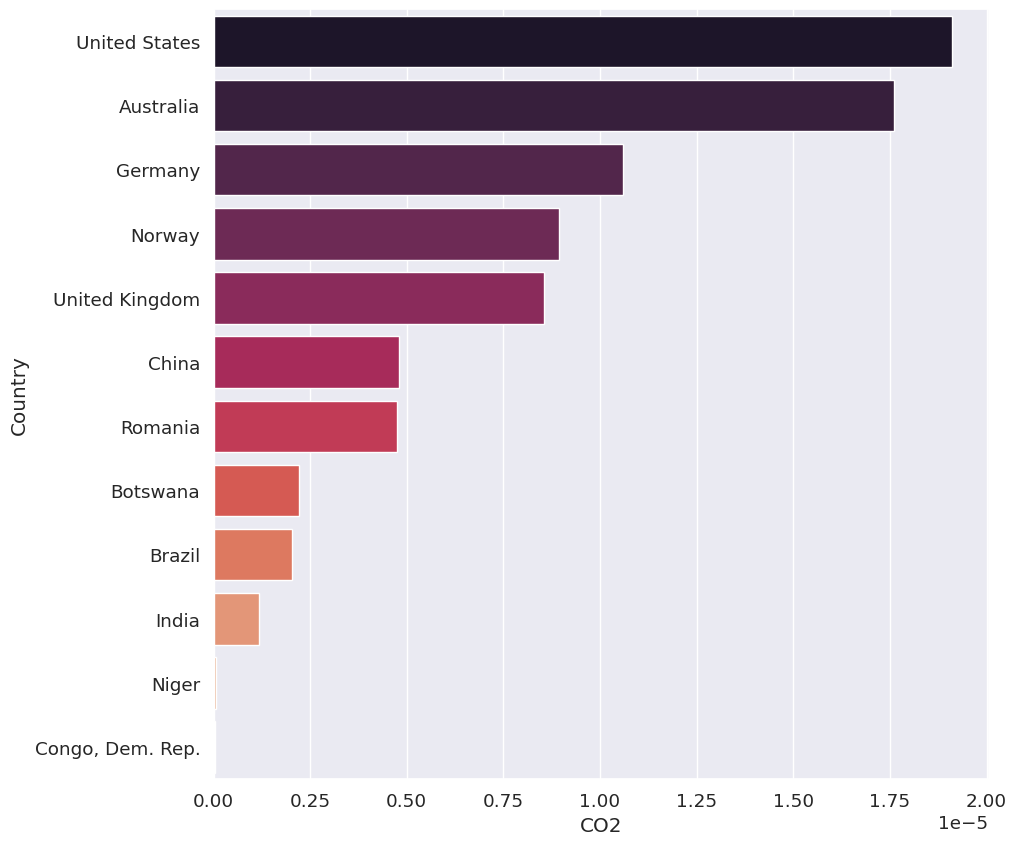

In [151]:
import seaborn as sns

df1 = data.groupby("Country")['CO2'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
f = sns.barplot(data = df1, x = 'CO2', y = 'Country',palette = 'rocket')